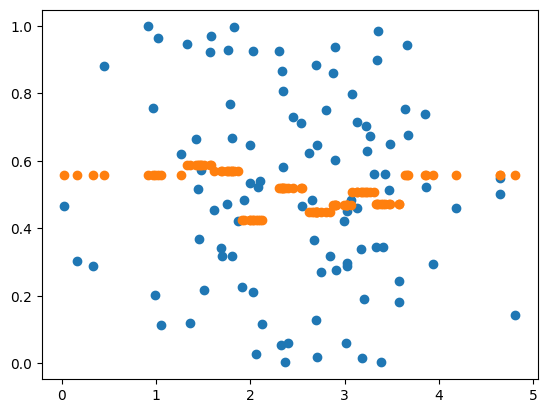

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


X = np.random.randn(100, 1) + 2.5
# uniform on [0, 1] 
y = stats.uniform.rvs(size=100)

plr_pipeline = Pipeline(
    [
        ("binning", KBinsDiscretizer(n_bins=10, encode="onehot", strategy="quantile")),
        ("regressor", LinearRegression(fit_intercept=True)),
    ]
)

plr_pipeline.fit(X, y)

y_pred = plr_pipeline.predict(X)

plt.scatter(X, y)
plt.scatter(X, y_pred)


In [102]:
plr_pipeline.get_params()

{'memory': None,
 'steps': [('binning', KBinsDiscretizer(n_bins=10)),
  ('regressor', LinearRegression())],
 'transform_input': None,
 'verbose': False,
 'binning': KBinsDiscretizer(n_bins=10),
 'regressor': LinearRegression(),
 'binning__dtype': None,
 'binning__encode': 'onehot',
 'binning__n_bins': 10,
 'binning__random_state': None,
 'binning__strategy': 'quantile',
 'binning__subsample': 200000,
 'regressor__copy_X': True,
 'regressor__fit_intercept': True,
 'regressor__n_jobs': None,
 'regressor__positive': False}

In [103]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


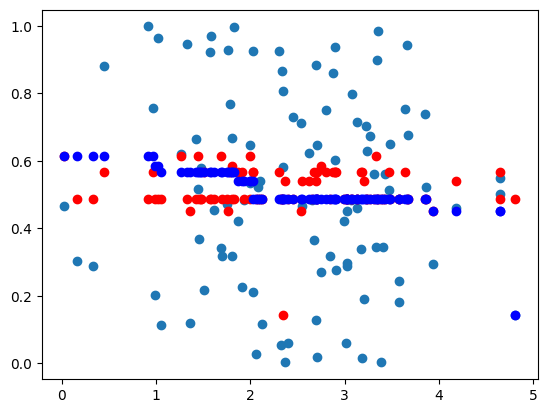

In [104]:
from sklearn.isotonic import IsotonicRegression

sorted_indices = np.argsort(X.flatten())
X_sorted = X[sorted_indices, :]
y_sorted = y[sorted_indices]

iso_reg = IsotonicRegression(increasing=False, out_of_bounds="clip")
iso_reg.fit(X, y)
y_pred = iso_reg.predict(X)

iso_reg_sorted = IsotonicRegression(increasing=False, out_of_bounds="clip")
iso_reg_sorted.fit(X_sorted, y_sorted)

y_pred_sorted = iso_reg_sorted.predict(X_sorted)

plt.scatter(X_sorted, y_sorted)
plt.scatter(X_sorted, y_pred, color="red")
plt.scatter(X_sorted, y_pred_sorted, color="blue")



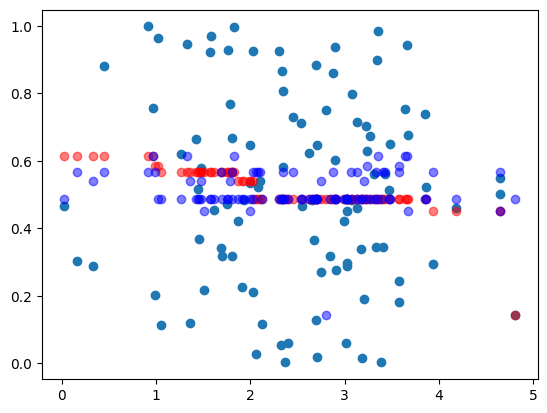

In [105]:
plt.scatter(X, y)
plt.scatter(X, y_pred, color="red", alpha=0.5)
plt.scatter(X, y_pred_sorted, color="blue", alpha=0.5)


In [107]:
from functools import partial

theta_star = partial(iso_reg_sorted.predict)


In [108]:
new_theta_star_inverse_values = theta_star_inverse(y_sorted, theta_star, X_sorted).flatten()

In [109]:
theta_star_values = theta_star(X_sorted)
U_sorted = X_sorted
def theta_star_inverse_old(y):
        """
        Computes the generalized inverse of theta_star:
        g^{-1}(y) = inf{ x : g(x) <= y }

        Parameters:
        y (float or array-like): Value(s) to find the inverse for

        Returns:
        float or array: The inverse value(s)
        """

        y = np.asarray(y)
        result = np.zeros_like(y)

        for i, yi in enumerate(y.flat):
            valid_points = theta_star_values <= yi
            if not np.any(valid_points):
                result.flat[i] = U_sorted[-1]  # Changed from first to last point
            else:
                result.flat[i] = U_sorted[valid_points][
                    0
                ]  # Changed from last to first valid point

        return result.reshape(y.shape)
old_theta_star_inverse_values = theta_star_inverse_old(y_sorted)

/tmp/ipykernel_290226/576286978.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result.flat[i] = U_sorted[valid_points][
/tmp/ipykernel_290226/576286978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result.flat[i] = U_sorted[-1]  # Changed from first to last point


In [110]:
print(old_theta_star_inverse_values)
print(new_theta_star_inverse_values)

[3.93453341 4.81021147 4.81021147 0.02436271 0.02436271 0.02436271
 4.81021147 0.02436271 4.81021147 0.02436271 0.02436271 4.81021147
 0.02436271 2.03063401 4.81021147 1.05417194 1.05417194 4.81021147
 0.02436271 0.02436271 3.93453341 4.81021147 4.81021147 3.93453341
 0.02436271 0.02436271 0.02436271 4.81021147 0.02436271 4.81021147
 4.81021147 3.93453341 0.02436271 2.03063401 0.02436271 4.81021147
 4.81021147 2.03063401 2.03063401 4.81021147 0.02436271 4.81021147
 0.02436271 1.05417194 0.02436271 4.81021147 4.81021147 0.02436271
 0.02436271 3.93453341 0.02436271 3.93453341 4.81021147 0.02436271
 4.81021147 0.02436271 4.81021147 4.81021147 0.02436271 4.81021147
 0.02436271 0.02436271 0.98369508 4.81021147 4.81021147 4.81021147
 4.81021147 4.81021147 4.81021147 3.93453341 0.02436271 3.93453341
 0.02436271 4.81021147 4.81021147 4.81021147 0.02436271 0.02436271
 0.02436271 1.87039257 4.81021147 0.02436271 0.02436271 4.81021147
 4.81021147 1.87039257 2.03063401 0.02436271 4.81021147 4.8102

In [111]:
old_theta_star_inverse_values == new_theta_star_inverse_values[::-1]

array([False,  True,  True,  True,  True, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
       False])

In [112]:
np.allclose(old_theta_star_inverse_values, new_theta_star_inverse_values[::-1], atol=1e-3)

False

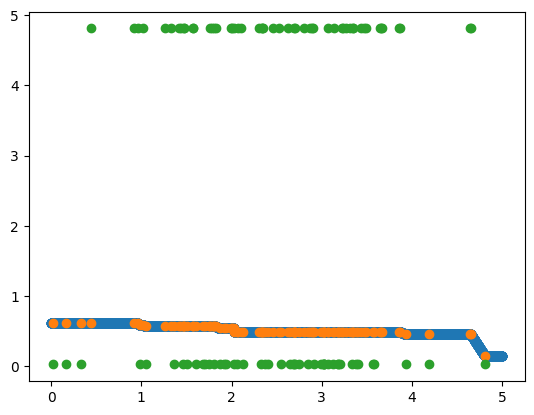

In [120]:
isoreg_values = theta_star(np.linspace(0, 5, 10000))
plt.scatter(np.linspace(0, 5, 10000), isoreg_values)
plt.scatter(X_sorted, theta_star_values)
plt.scatter(X_sorted, new_theta_star_inverse_values)

In [259]:
import numpy as np
from typing import Callable, Union

def generalized_inverse(
    y: Union[float, np.ndarray],
    theta: Callable,
    X: np.ndarray,
) -> np.ndarray:
    """
    Computes the generalized inverse of theta:
      g^{-1}(y) = inf { x in U_sorted : theta(x) <= y }

    Parameters:
        y: A float or an array-like of target values.
        theta: A callable function that maps x-values to predictions. theta should be a decreasing function.
        X: A sorted (monotonic) array of x values over which theta is defined.

    Returns:
        An array of x values corresponding to the inverse evaluation.
    """
    # make sure X and y are numpy arrays
    X = np.asarray(X)
    y = np.asarray(y)
    # sort X in descending order
    X = np.sort(X)[::-1]
    # Evaluate decreasing theta function on the sorted x values. Results in an increasing array.
    theta_vals = theta(X)
    print("theta_vals", theta_vals)

    # Find the index where each y would be inserted to keep theta_vals sorted.
    # searchsorted assumes theta_vals is sorted in ascending order
    # "right" means that we choose the larger theta(X) value (smaller X value) in the case of a tie
    idx = np.searchsorted(theta_vals, y, side="right")
    print("idx where y would be inserted", idx)
    # searchsorted returns the index where y would be inserted to keep theta_vals sorted
    # so we need to subtract 1 to get the index of the largest theta(X) value that is less than or equal to y
    idx = idx - 1
    # We don't want to wrap around the end of the array, so we set any idx == -1 to 0
    idx = np.where(idx == -1, 0, idx)
    return X[idx]

[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]
[ 2.          1.72222222  1.44444444  1.16666667  0.88888889  0.61111111
  0.33333333  0.05555556 -0.22222222 -0.5       ]
[4.44444444 3.33333333 3.88888889 2.22222222 3.33333333 1.66666667
 5.         5.         0.        ]
theta_vals [-0.5        -0.22222222  0.05555556  0.33333333  0.61111111  0.88888889
  1.16666667  1.44444444  1.72222222  2.        ]
idx where y would be inserted [ 2  4  3  6  4  7  0  0 10]
[4.44444444 3.33333333 3.88888889 2.22222222 3.33333333 1.66666667
 5.         5.         0.        ]


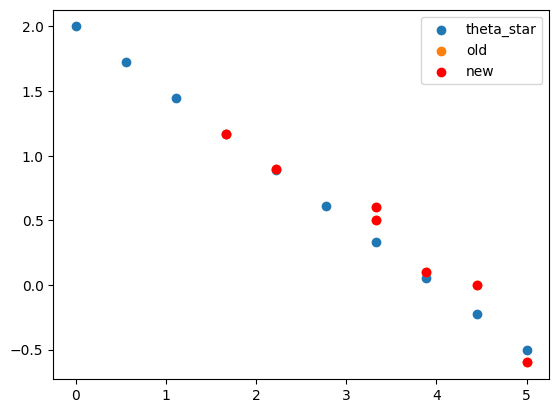

In [260]:
U_sorted = np.linspace(0, 5, 10)
print(U_sorted)
# decreasing function of t
theta_star_values = - 0.5 * U_sorted + 2
print(theta_star_values)
theta_star = partial(lambda x: -0.5 * x + 2)
plt.scatter(U_sorted, theta_star_values, label="theta_star")
candidates = np.array([0, 0.6, 0.1, 0.9, 0.5, theta_star_values[3], theta_star_values[-1]-0.1, -np.inf, np.inf])
inverted_candidates = theta_star_inverse_old(candidates)
print(inverted_candidates)

plt.scatter(inverted_candidates, candidates, label="old")

np.random.shuffle(U_sorted)
inverted_candidates = generalized_inverse(candidates, theta_star, U_sorted)
print(inverted_candidates)
plt.scatter(inverted_candidates, candidates, label="new", color="red")
plt.legend()


In [225]:
np.searchsorted([1, 3, 2, 3.1, 3.1, 4, 5], [0.1, 2.9,3.1, 4.1], side="left", sorter=[0, 2, 1, 3, 4, 5, 6])

array([0, 2, 3, 6])

In [223]:
np.argsort([0, 2, 1, 3, 4, 10])

array([0, 2, 1, 3, 4, 5])